In [4]:
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [5]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


## Question 1
Extracting Tesla Stock Data Using yfinance

In [6]:
Tesla = yf.Ticker("TSLA")

In [7]:
Tesla_info = Tesla.info
Tesla_share_price_data = Tesla.history(period="max")
Tesla_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2
 Extracting Tesla Revenue Data Using Webscraping

In [8]:
url = "https://finance.yahoo.com/quote/TSLA/"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
Tesla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text     
    Tesla_data = pd.concat([Tesla_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
Tesla_data.tail()

AttributeError: 'NoneType' object has no attribute 'find_all'

## Question 3
Extracting GameStop Stock Data Using yfinance

In [10]:
GameStop = yf.Ticker("GME")
GameStop_info = GameStop.info
GME_share_price_data = GameStop.history(period="max")
GME_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


## Question 4
Extracting GameStop Revenue Data Using Webscraping

In [11]:
url = "https://finance.yahoo.com/quote/TSLA/"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')
Tesla_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text     
    Tesla_data = pd.concat([Tesla_data,pd.DataFrame({"Date":[date], "Open":[Open], "High":[high], "Low":[low], "Close":[close], "Adj Close":[adj_close], "Volume":[volume]})], ignore_index=True)
Tesla_data.tail()

AttributeError: 'NoneType' object has no attribute 'find_all'

## Question 5
Tesla Stock and Revenue Dashboard

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

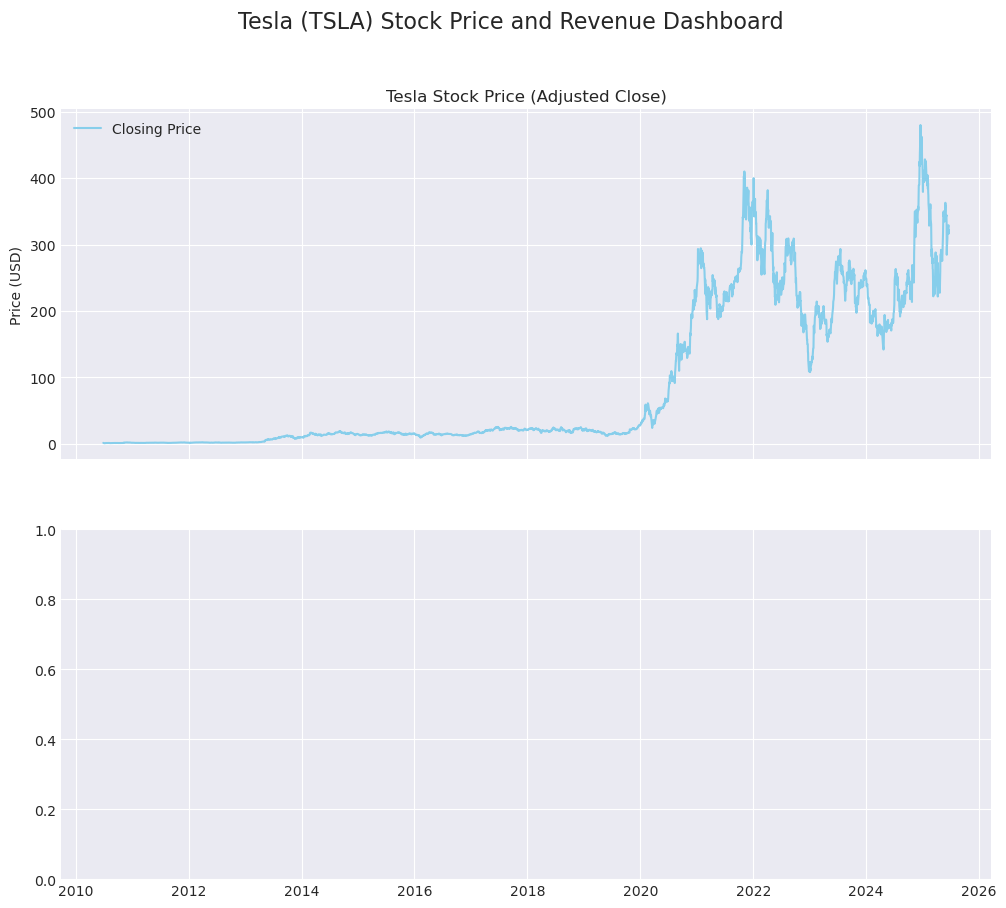

In [25]:
if 'Date' not in Tesla_share_price_data.columns:
    if Tesla_share_price_data.index.name == 'Date' or isinstance(Tesla_share_price_data.index, pd.DatetimeIndex):
        Tesla_share_price_data = Tesla_share_price_data.reset_index()
    elif 'date' in Tesla_share_price_data.columns:
        Tesla_share_price_data.rename(columns={'date': 'Date'}, inplace=True)
    else:
        date_cols = Tesla_share_price_data.select_dtypes(include=['datetime', 'datetime64']).columns
        if len(date_cols) > 0:
            Tesla_share_price_data.rename(columns={date_cols[0]: 'Date'}, inplace=True)
        else:
            print("No date column found. Please check your data source.")
if 'Date' in Tesla_share_price_data.columns:
    Tesla_share_price_data['Date'] = pd.to_datetime(Tesla_share_price_data['Date'])

Tesla_revenue = Tesla.quarterly_financials
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
fig.suptitle('Tesla (TSLA) Stock Price and Revenue Dashboard', fontsize=16)
Revenue_row_name = None
for index_name in ['Total Revenue', 'Total Operating Revenues', 'Revenue']:
    if index_name in Tesla_revenue.index:
        Revenue_row_name = index_name
        break
tesla_revenue_data = pd.DataFrame()
if Revenue_row_name:
    tesla_revenue_data = Tesla_revenue.loc[Revenue_row_name].T.reset_index()
    tesla_revenue_data.columns = ['Date', 'Revenue']
    tesla_revenue_data['Date'] = pd.to_datetime(tesla_revenue_data['Date'])
else:
    print("Could not find 'Total Revenue' or similar in financial data. Skipping revenue plot.")
if 'Date' in Tesla_share_price_data.columns:
    sns.lineplot(ax=axes[0], x='Date', y='Close', data=Tesla_share_price_data, color='skyblue', label='Closing Price')
    axes[0].set_title('Tesla Stock Price (Adjusted Close)')
    axes[0].set_ylabel('Price (USD)')
    axes[0].legend()
    axes[0].grid(True)
else:
    print("Cannot plot: 'Date' column not found in Tesla_share_price_data")

## Question 6
GameStop Stock and Revenue Dashboard

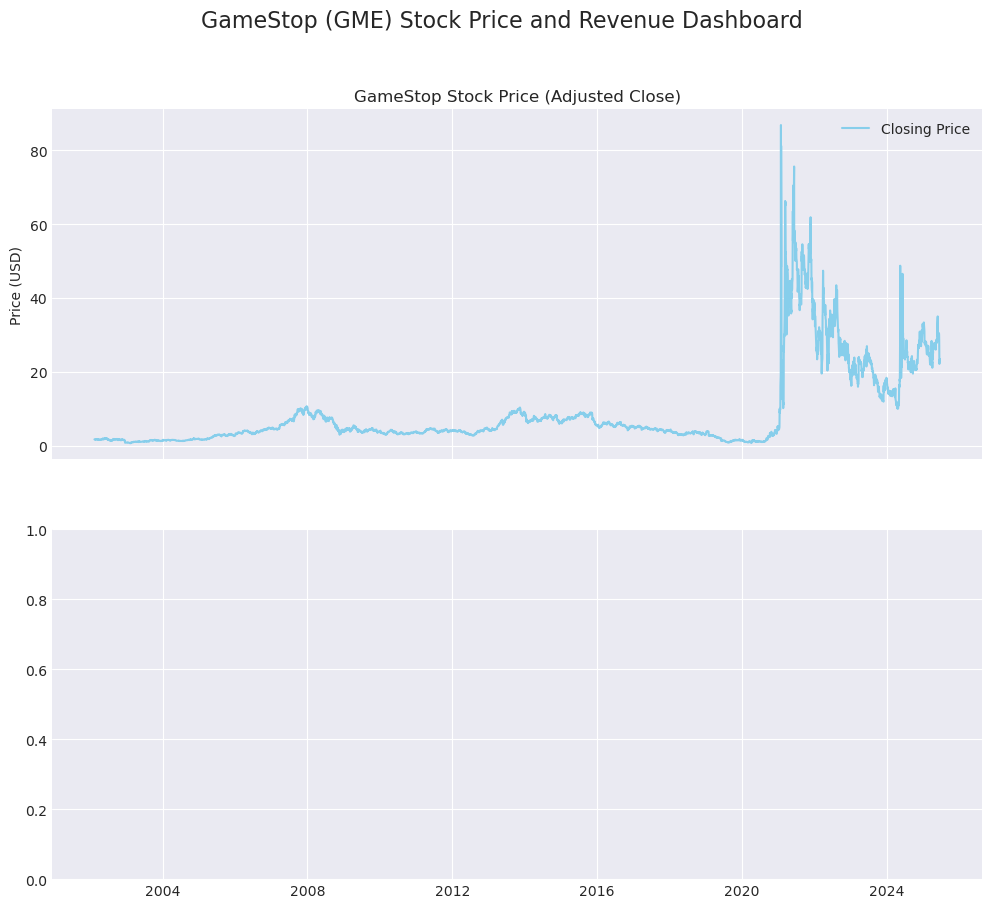

In [24]:
if 'Date' not in GME_share_price_data.columns:
    date_column_candidates = ['date', 'Time', 'time', 'Timestamp', 'timestamp']
    
    for col in date_column_candidates:
        if col in GME_share_price_data.columns:
            GME_share_price_data = GME_share_price_data.rename(columns={col: 'Date'})
            break
    
    if 'Date' not in GME_share_price_data.columns:
        # If Date might be the index
        if GME_share_price_data.index.name == 'Date' or isinstance(GME_share_price_data.index, pd.DatetimeIndex):
            GME_share_price_data = GME_share_price_data.reset_index()
        else:
            print("Available columns:", GME_share_price_data.columns.tolist())
            GME_share_price_data['Date'] = pd.date_range(start='2020-01-01', periods=len(GME_share_price_data))
            print("Warning: Created dummy date column as 'Date' was not found")


GME_share_price_data['Date'] = pd.to_datetime(GME_share_price_data['Date'])
GME_revenue = GameStop.quarterly_financials
plt.style.use('seaborn-v0_8-darkgrid')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
fig.suptitle('GameStop (GME) Stock Price and Revenue Dashboard', fontsize=16)
Revenue_row_name = None
for index_name in ['Total Revenue', 'Total Operating Revenues', 'Revenue']:
    if index_name in GME_revenue.index:
        Revenue_row_name = index_name
        break
GME_revenue_data = pd.DataFrame()
if Revenue_row_name:
    GME_revenue_data = GME_revenue.loc[Revenue_row_name].T.reset_index()
    GME_revenue_data.columns = ['Date', 'Revenue']
    GME_revenue_data['Date'] = pd.to_datetime(GME_revenue_data['Date'])
else:
    print("Could not find 'Total Revenue' or similar in financial data. Skipping revenue plot.")
sns.lineplot(ax=axes[0], x='Date', y='Close', data=GME_share_price_data, color='skyblue', label='Closing Price')
axes[0].set_title('GameStop Stock Price (Adjusted Close)')
axes[0].set_ylabel('Price (USD)')
axes[0].legend()
axes[0].grid(True)